**HTML** 

The html parser will be used to illustrate an application of derived classes.

We'll use the parser to extract some data posted at a web site.

Before getting to that we discuss the structure of html.

Take a look at this web site with annual inflation rates from the Minneapolis fed:

https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-

When we point our browser to a url, a file is passed to the browser for displying.

We can view that file (the *page source*) and inspect its structure.

**Structure of HTML files**

A typical HTML file has the following:

- **doctype header** which looks like \<!DOCTYPE ... \>

Followed by 

- **tags** which have the form \<...\>. These typically tell the browser how to display the data 

interspersed with 

- **data** which is not enclosed in the tags content (text, images, an executable script). 


**Tags**

There are many different types of tags. 

Some tags provide *comments* - these take the form: \<!-- ... --> and are ignored by the browser

Tags that actually do something meaningful are either 

- opening tags,
- closing tags, or
- self-closing tags.

**Opening and closing tags**

An *opening* tag is of the form \<tagname ...>. 

Such tags include \<html ...>, \<body ...>,  \<table ...>, \<div ...>. 

Opening tags are paired with *closing* tags, which take the form \</tagname>.

For example:

- **html** The entire html document after the doctype header typically starts with an opening \<html> tag
and ends with a closing \</html> tag.

- **table** A table in the html document would start with an opening \<table> and end with a closing \</table> tag.

- **tr** A row in a table would start with an opening \<tr> and end with a closing \</tr> tag.

- **p** A paragraph would start with an opening \<p> and end with a closing \</p> tag.

- **div** A section/division of an html file would have an opening \<div> and a closing \</div> tag.

**Self-closing tags**

A self-closing tag (a tag that is both *opening* and *closing*) takes the form <tagname .../>. 

For example

- a line break is created using a \<br/> tag
- an image uses a \<img ... /> tag
- a hyperlink (link to another page) uses a \<link ... /> tag

**Attributes**

Tags may carry with them extra information, referred to as attributes. These appear inside the tag itself. For example

\<html lang="en">

and 

\<meta property="twitter:card" content="summary_large_image" />

**Data**

Again, material not appearing inside a tag is referred to as data.

**Requests package**

In additional to directly viewing a page's source we can download that source page an extract information from it.

To motivate what follows, we would like to extract the inflation data from the table appearing on this page and store it in as some sort of Python object (list/dictionary/array etc), or write it out to a file.

Below, we

- import the package
- do a **get** to extract a response from the above
- print the status code for the response (200 means success, 404 means failure).

In the following case, I deliberatly mis-spell the url.

In [3]:
import requests as req
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-2calculator/consumer-price-index-1913-"
res=req.get(url)
print(res.status_code)

404


And use the correct url here.

In [4]:
import requests as req
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-"
res=req.get(url)
print(res.status_code)

200


**Getting the text**

Having been successful we can extract the **text** (page source), which is an attribute of the response.

In [5]:
import requests as req
url="https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-"
res=req.get(url)
text=res.text
with open("pagesource.html","w") as fout:
    fout.write(text)

We can open that html file in Jupyter.

**Tree structure**

Opening and closing tags must be nested, meaning that if we have two different pairs of opening and closing tags, say \<tag1>, \<tag1/>, \<tag2>, \<tag2/>, they can be ordered like this in the file:

>\<tag1> <br/>
>\<tag2> <br/>
>\<tag2/> <br/>
> \<tag1/> <br/>

or like this:

>\<tag2> <br/>
>\<tag1><br/>
>\<tag1/><br/>
> \<tag2/><br/>

But this would not be allowed:

>\<tag1> <br/>
>\<tag2><br/>
>\<tag1/><br/>
> \<tag2/><br/>

nor would this

>\<tag2> <br/>
>\<tag1> <br/>
>\<tag2/> <br/>
> \<tag1/> <br/>

In the first case

>\<tag1> <br/>
>\<tag2> <br/>
>\<tag2/> <br/>
> \<tag1/> <br/>

in which tag2 is nested inside tag1, we can think of tag2 as a *child* of tag1.

As a consequence, the tags define a tree-like structure which we can represent pictorially.
To illustrate with a small example, consider the small file **sample.html** which looks like this:

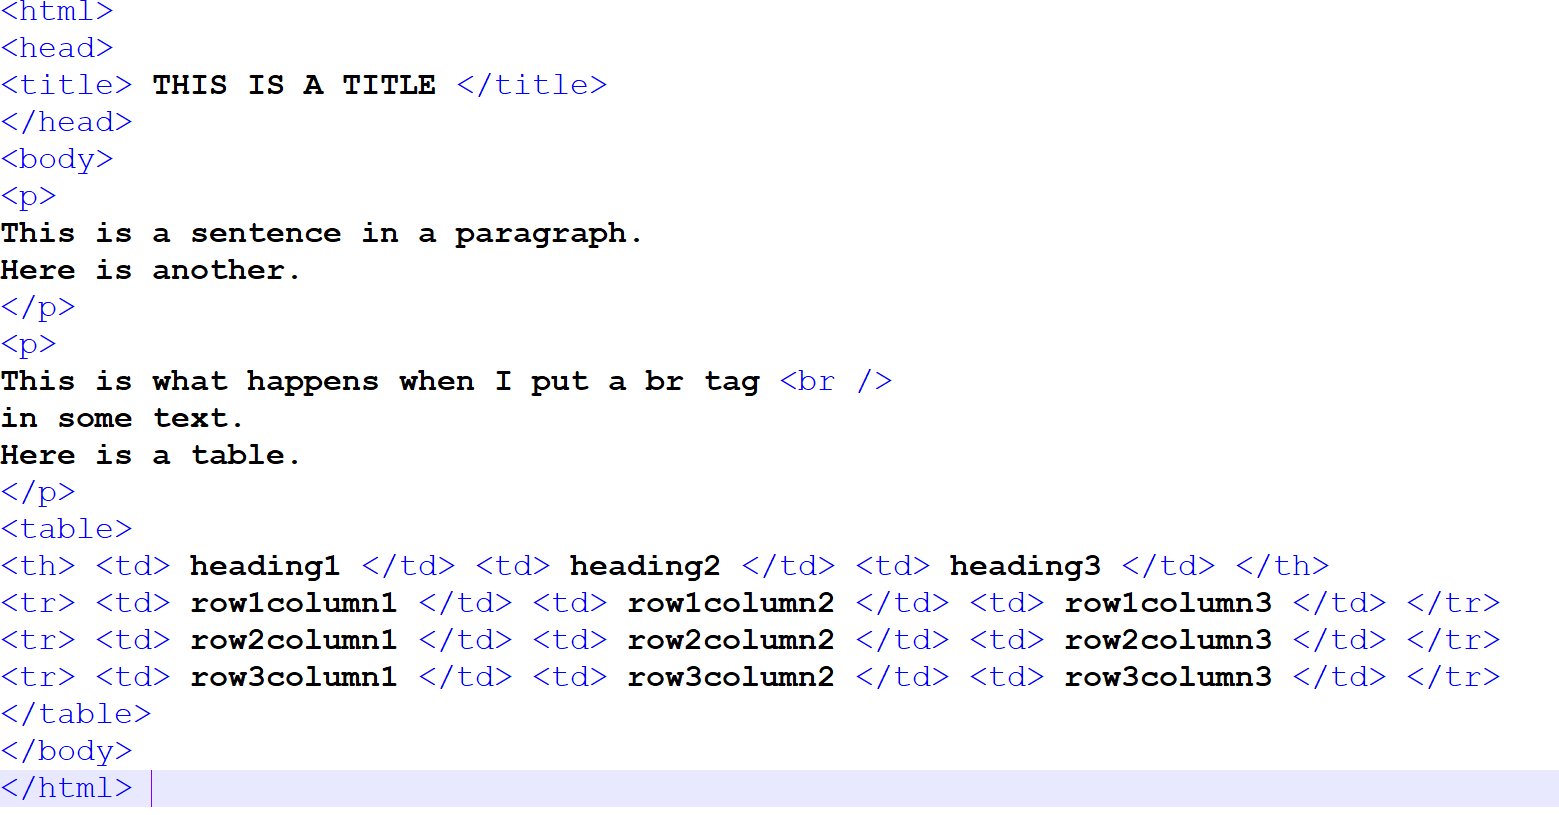

The tree structure can be displayed using an opening tag in each line and using an indent to represent the child relationship.

<html>
	<head>
		<title>
	<body>
		<p>
		<p>
			<br />
		<table>
			<th>
				<td>
				<td>
				<td>
			<tr>
				<td>
				<td>
				<td>
			<tr>
				<td>
				<td>
				<td>
			<tr>
				<td>
				<td>
				<td>

**HTML Tables**

An html table has in its simplest form: 

- an optional header row with column headings enclosed in \<th> .. \</th> tags.
- table body rows which are enclosed in \<tr> ... \</tr> tags 
- data in the body of the table enclosed in \<td> .. \</td> tags.

**Question.** How can we programmatically extract the inflation data from the online table?

We'll talk about this in the lecture on the html parser.